<a href="https://colab.research.google.com/github/clemgi0/movie-analyser_deep-learning-proyecto/blob/main/01_exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Analyser | Deep Learning Final Project

In this serie of notebook, we will follow my avances for this project. Let's begin by defining it. Basically, what I want to achieve is to create a deep learning IA model using Keras and Tensorflow that could predict the success of a movie through it's resume, and some other possible input datas like the name of the movie, it's director or it's genre.


### Data exploration
https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
https://www.kaggle.com/datasets/stefanoleone992/filmtv-movies-dataset

In this first notebook, we will download the datas that we will use to train and test my models. These datas will come from different online public access datasets and contain at least :    
-an overview/resume of the movie as text, it's genre and it's director

-a rating of the movie (IMDB rating, meta-score, public or critics votes...)

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## IMDB Movies Dataset

First, we will download the "IMDB Movies Dataset" from Kaggle. Though this is a little dataset (a 1000 movies), it will help us to create a first model that we could fine tune until we will a bigger dataset to test our model and adjust it so that it fits to any size of datasets.



Here are it's features:

0 Poster_Link - Link of the poster that imdb using

1 Series_Title = Name of the movie

2 Released_Year - Year at which that movie released

3 Certificate - Certificate earned by that movie

4 Runtime - Total runtime of the movie

5 Genre - Genre of the movie

6 IMDB_Rating - Rating of the movie at IMDB site

7 Overview - mini story/ summary

8 Meta_score - Score earned by the movie

9 Director - Name of the Director

10, 11, 12, 13 Star1,Star2,Star3,Star4 - Name of the Stars

14 No_of_votes - Total number of votes

15 Gross - Money earned by that movie

In [52]:
import kagglehub

# Download latest version
path1 = kagglehub.dataset_download("harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows")

print("Path to dataset files:", path1)

Using Colab cache for faster access to the 'imdb-dataset-of-top-1000-movies-and-tv-shows' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows


In [53]:
import os

files_in_path1 = os.listdir(path1)
csv_files1 = [f for f in files_in_path1 if f.endswith('.csv')]

if csv_files1:
    data_file1 = os.path.join(path1, csv_files1[0])
    # Assuming the first CSV file is the one the user wants
    print(f"Loading data from: {data_file1}")
    df1 = pd.read_csv(data_file1)
else:
    print("No CSV files found in the specified path. Please specify which file to load if it's not a CSV or has a different extension.")

Loading data from: /kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


Here, we can see that the data have been arranged in descending order by IMDB Ratings, so to avoid any problem in the future, we shuffle the datas.

In [54]:
df1.to_numpy()[:30,6], df1.to_numpy()[970:,6],

(array([9.3, 9.2, 9.0, 9.0, 9.0, 8.9, 8.9, 8.9, 8.8, 8.8, 8.8, 8.8, 8.8,
        8.7, 8.7, 8.7, 8.7, 8.7, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6,
        8.6, 8.6, 8.6, 8.6], dtype=object),
 array([7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6,
        7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6,
        7.6, 7.6, 7.6, 7.6], dtype=object))

In [55]:
df_shuffled1 = df1.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle the datas to avoid linear IMDB rating

data1 = df_shuffled1.to_numpy()
print(f"Successfully loaded data into a NumPy array with shape: {data1.shape}")
print("First 3 rows of the loaded data:\n", data1[:3,:])

Successfully loaded data into a NumPy array with shape: (1000, 16)
First 3 rows of the loaded data:
 [['https://m.media-amazon.com/images/M/MV5BMjg5OGU4OGYtNTZmNy00MjQ1LWIzYzgtMTllMGY2NzlkNzYwXkEyXkFqcGdeQXVyMTI3ODAyMzE2._V1_UY98_CR2,0,67,98_AL_.jpg'
  'Trois couleurs: Bleu' '1993' 'U' '94 min' 'Drama, Music, Mystery' 7.9
  'A woman struggles to find a way to live her life after the death of her husband and child.'
  85.0 'Krzysztof Kieslowski' 'Juliette Binoche' 'Zbigniew Zamachowski'
  'Julie Delpy' 'Benoît Régent' 89836 '1,324,974']
 ['https://m.media-amazon.com/images/M/MV5BMzA2NDkwODAwM15BMl5BanBnXkFtZTgwODk5MTgzMTE@._V1_UY98_CR0,0,67,98_AL_.jpg'
  'Captain America: The Winter Soldier' '2014' 'UA' '136 min'
  'Action, Adventure, Sci-Fi' 7.7
  'As Steve Rogers struggles to embrace his role in the modern world, he teams up with a fellow Avenger and S.H.I.E.L.D agent, Black Widow, to battle a new threat from history: an assassin known as the Winter Soldier.'
  70.0 'Anthony Russo' 'J

In [67]:
x1 = data1[:, [1, 5, 7, 9]] # Name of the movie / Genre / Overview / Director
y1 = data1[:, [6, 8]] # IMDB rating / meta-score

print("Shape the training datas:", x1.shape)
print("\nFirst rows of the training datas:\n", x1[:3])
print("\nShape of the validating datas:", y1.shape)
print("\nFirst rows of the validating datas:\nIMDB rating | Meta score\n", y1[:3])

Shape the training datas: (1000, 4)

First rows of the training datas:
 [['Trois couleurs: Bleu' 'Drama, Music, Mystery'
  'A woman struggles to find a way to live her life after the death of her husband and child.'
  'Krzysztof Kieslowski']
 ['Captain America: The Winter Soldier' 'Action, Adventure, Sci-Fi'
  'As Steve Rogers struggles to embrace his role in the modern world, he teams up with a fellow Avenger and S.H.I.E.L.D agent, Black Widow, to battle a new threat from history: an assassin known as the Winter Soldier.'
  'Anthony Russo']
 ['Wreck-It Ralph' 'Animation, Adventure, Comedy'
  'A video game villain wants to be a hero and sets out to fulfill his dream, but his quest brings havoc to the whole arcade where he lives.'
  'Rich Moore']]

Shape of the validating datas: (1000, 2)

First rows of the validating datas:
IMDB rating | Meta score
 [[7.9 85.0]
 [7.7 70.0]
 [7.7 72.0]]


We can also note that the meta data sometimes contains NaN values that we will have to take care of later on.

In [57]:
print("First 50 values of the meta score:\n", y1[:50,1])

First 50 values of the meta score:
 [85.0 70.0 72.0 55.0 79.0 72.0 80.0 84.0 91.0 nan 47.0 nan 61.0 63.0 70.0
 nan 83.0 60.0 nan nan 87.0 nan 85.0 79.0 79.0 79.0 95.0 64.0 80.0 64.0
 88.0 nan 78.0 83.0 82.0 nan 73.0 68.0 68.0 78.0 69.0 55.0 86.0 60.0 nan
 77.0 70.0 nan 84.0 nan]


We can also already note a problem with that dataset, thanks to these graphs that are provided by Kaggle, and it is that the ratings aren't very diversified.

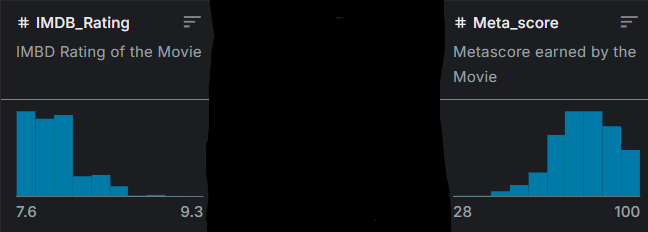

In fact, we can see that more than half of the IMDB ratings tends to stay between 7.6 and 8 out of 10. This is also the case with the meta score rating where the majority of the values stays between 64 and 100. Though it is a bit more diversified, it isn't enough.

This is a problem because if we want our model to be able to diferentiate good movies from bad movies with few data in entry, we will have to train with a larger and more diverse dataset of movies.

## FilmTV movies dataset

Now, we will download this second dataset that is much larger (41k entries) and that contains a better diversity in it's movies ratings.

We shuffle it too to be sure to avoid any order bias in the future.



Here are the features of this dataset:

0 Filmtv_id - Movie id

1 Title - Name of the movie

2 Year - Movie year of release

3 Genre - Movie genre

4 Duration - Movie duration (in min)

5 Country - Countries where the movie was filmed

6 Directors - Name of movie directors

7 Actors - Name of movie actors

8 Avg_vote - Average rating (by critics and public)

9 Critics_vote - Average vote of the critics

10 Public_vote - Average vote of the public

11 Total_vote - Total votes expressed by critics and public

12 Overview - Movie description

13 Notes - Movie notes

14 Humor - Movie humor score given by filmtv

15 Rythm - Movie rythm score given by filmtv

16 Tension - Movie tension score given by filmtv

17 Erotism - Movie erotism score given by filmtv

In [91]:
# Download latest version
path2 = kagglehub.dataset_download("stefanoleone992/filmtv-movies-dataset")

print("Path to dataset files:", path2)

files_in_path2 = os.listdir(path2)
csv_files2 = [f for f in files_in_path2 if f.endswith('.csv')]

if csv_files2:
    data_file2 = os.path.join(path2, csv_files2[0])
    # Assuming the first CSV file is the one the user wants
    print(f"Loading data from: {data_file2}")
    df2 = pd.read_csv(data_file2)

    df_shuffled2 = df2.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle the datas to avoid linear IMDB rating

    data2 = df_shuffled2.to_numpy()
    print(f"\nSuccessfully loaded data into a NumPy array with shape: {data2.shape}")
    print("\nFirst 3 rows of the loaded data:\n", data2[:3,:])
else:
    print("No CSV files found in the specified path. Please specify which file to load if it's not a CSV or has a different extension.")

Using Colab cache for faster access to the 'filmtv-movies-dataset' dataset.
Path to dataset files: /kaggle/input/filmtv-movies-dataset
Loading data from: /kaggle/input/filmtv-movies-dataset/filmtv_movies.csv

Successfully loaded data into a NumPy array with shape: (41399, 19)

First 3 rows of the loaded data:
 [[20764 'Svadba' 2000 'Comedy' 114 'France, Russia, Germany'
  'Pavel Lungin'
  'Marat Basharov, Mariya Mironova, Andrei Panin, Vladimir Simonov' 7.0
  7.0 7.0 4
  'Mishka and Tania, friends since school, are getting married. But something is wrong because the girl leaves for Moscow and disappears for a few years. Having vanished the dreams of becoming a model, she decides to return to the country to marry the good Mishka, muscular and solid worker with a clean face, still in love with her. At this point the film tells about the wedding preparations, the ceremony, the dramas and the trafficking that goes through it.'
  'The Russian Pavel Longuine is reminded of the interesting fi

In [92]:
x2 = data2[:, [1, 3, 6, 12]] # Title / Genre / Directors / Overview
y2 = data2[:, [9, 10]] # Critics votes / Public votes

print("Shape the training datas:", x2.shape)
print("\nFirst rows of the training datas:\n", x2[:3])
print("\nShape of the validating datas:", y2.shape)
print("\nFirst rows of the validating datas:\n critics votes | public votes\n", y2[:3])

Shape the training datas: (41399, 4)

First rows of the training datas:
 [['Svadba' 'Comedy' 'Pavel Lungin'
  'Mishka and Tania, friends since school, are getting married. But something is wrong because the girl leaves for Moscow and disappears for a few years. Having vanished the dreams of becoming a model, she decides to return to the country to marry the good Mishka, muscular and solid worker with a clean face, still in love with her. At this point the film tells about the wedding preparations, the ceremony, the dramas and the trafficking that goes through it.']
 ['The Phantom of Crestwood' 'Thriller' 'J. Walter Ruben'
  'Pushed by the beautiful Jenny Wren, banker Priam Andes throws a party at Crestwood, his summer residence. The girl asks Priam to also invite three wealthy men whom she intends to pluck, but her plans will be unexpectedly upset by an inexplicable death ...']
 ['Ragazzi della marina' 'War' 'Francesco De Robertis'
  'The cruiser "Raimondo Montecuccoli" leaves Livorno 

Here, we can see that the ratings are more diversified and that for the public ratings, it is approaching a gaussian shape, which is a good signe since this value is an average vote.

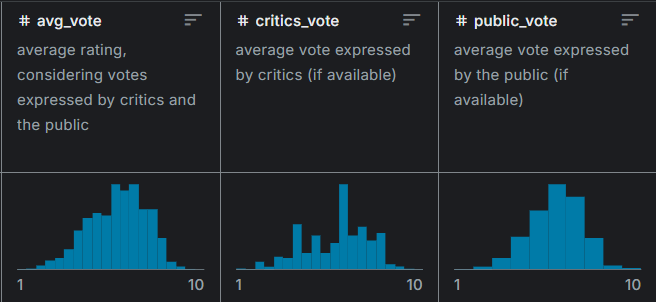

We should also notice that, as for the previous dataset, this one too contains NaN values from times to times that we will have to handle, most of all for the critic vote and for the overview features.

In [90]:
print("Critics votes:\n",data2[:50,9])

Critics votes:
 [7.0 6.0 6.0 nan 5.5 7.33 3.33 7.33 6.74 4.0 4.33 6.0 6.67 4.0 5.6 4.0 4.2
 7.67 6.0 6.0 7.22 3.0 3.0 nan 8.31 4.0 5.33 6.0 7.0 7.0 5.0 6.0 6.0 nan
 6.0 8.04 6.0 6.0 4.0 4.0 nan 6.67 6.25 4.0 6.25 7.1 7.0 nan 7.0 6.0]


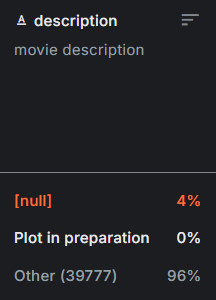